In [1]:
import pandas as pd
import numpy as np
import pickle

# Load data
df = pd.read_csv("/content/drive/MyDrive/SEM6miniproject/http_slowloris.pcap_Flow.csv")

# Rename columns to match model's expected format
rename_map = {
    'Dst Port':' Destination Port',
    'Flow Duration': ' Flow Duration',
    'Tot Fwd Pkts': ' Total Fwd Packets',
    'TotLen Fwd Pkts': 'Total Length of Fwd Packets',
    'TotLen Bwd Pkts': ' Total Length of Bwd Packets',
    'Fwd Pkt Len Max': ' Fwd Packet Length Max',
    'Fwd Pkt Len Mean': ' Fwd Packet Length Mean',
    'Fwd Pkt Len Std': ' Fwd Packet Length Std',
    'Bwd Pkt Len Max': 'Bwd Packet Length Max',
    'Bwd Pkt Len Min': ' Bwd Packet Length Min',
    'Bwd Pkt Len Mean': ' Bwd Packet Length Mean',
    'Bwd Pkt Len Std': ' Bwd Packet Length Std',
    'Flow Byts/s': 'Flow Bytes/s',
    'Flow Pkts/s': ' Flow Packets/s',
    'Flow IAT Mean': ' Flow IAT Mean',
    'Flow IAT Std': ' Flow IAT Std',
    'Flow IAT Max': ' Flow IAT Max',
    'Fwd IAT Tot': 'Fwd IAT Total',
    'Fwd IAT Mean': ' Fwd IAT Mean',
    'Fwd IAT Std': ' Fwd IAT Std',
    'Fwd IAT Max': ' Fwd IAT Max',
    'Fwd Header Len': ' Fwd Header Length',
    'Bwd Header Len': ' Bwd Header Length',
    'Bwd Pkts/s': ' Bwd Packets/s',
    'Pkt Len Max': ' Max Packet Length',
    'Pkt Len Mean': ' Packet Length Mean',
    'Pkt Len Std': ' Packet Length Std',
    'Pkt Len Var': ' Packet Length Variance',
    'PSH Flag Cnt': ' PSH Flag Count',
    'ACK Flag Cnt': ' ACK Flag Count',
    'Pkt Size Avg': ' Average Packet Size',
    'Fwd Seg Size Avg': ' Avg Fwd Segment Size',
    'Bwd Seg Size Avg': ' Avg Bwd Segment Size',
    'Subflow Fwd Pkts': 'Subflow Fwd Packets',
    'Subflow Fwd Byts': ' Subflow Fwd Bytes',
    'Subflow Bwd Byts': ' Subflow Bwd Bytes',
    'Init Fwd Win Byts': 'Init_Win_bytes_forward',
    'Init Bwd Win Byts': ' Init_Win_bytes_backward',
    'Fwd Act Data Pkts': ' act_data_pkt_fwd',
    'Fwd Seg Size Min': ' min_seg_size_forward',
    'Idle Mean': 'Idle Mean',
    'Idle Min': ' Idle Min'
}

In [2]:
df.rename(columns=rename_map, inplace=True)

# Columns expected by the model
required_columns = list(rename_map.values())

# Drop rows with inf/nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Keep only required columns
df = df[required_columns]

In [3]:
# Load scaler and encoder
with open('/content/drive/MyDrive/SEM6miniproject/MODELS/scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

with open('/content/drive/MyDrive/SEM6miniproject/MODELS/encoder.pkl', 'rb') as f:
    encoder = pickle.load(f)

with open('/content/drive/MyDrive/SEM6miniproject/MODELS/idsMODEL.pkl', 'rb') as f:
    model = pickle.load(f)

In [4]:
# Scale features
X_scaled = scaler.transform(df)

# Predict
predictions = model.predict(X_scaled)
decoded_predictions = encoder.inverse_transform(predictions)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [5]:
print(decoded_predictions)

['DoS slowloris' 'DoS slowloris' 'DoS slowloris' ... 'BENIGN' 'BENIGN'
 'BENIGN']


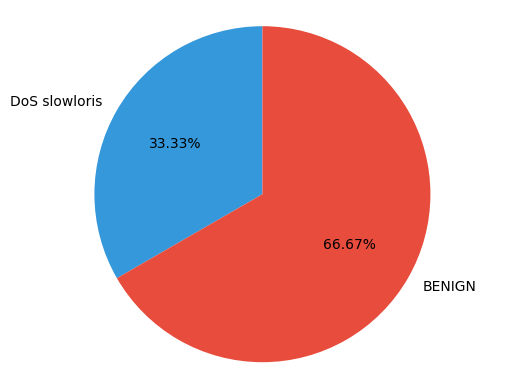

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Count each class in predictions
label_counts = Counter(decoded_predictions)

# Prepare data
labels = list(label_counts.keys())
sizes = list(label_counts.values())
colors = ['#3498db', '#e74c3c']  # Customize as needed

# Plot pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors)
ax.axis('equal')  # Equal aspect ratio ensures the pie is circular.
plt.show()


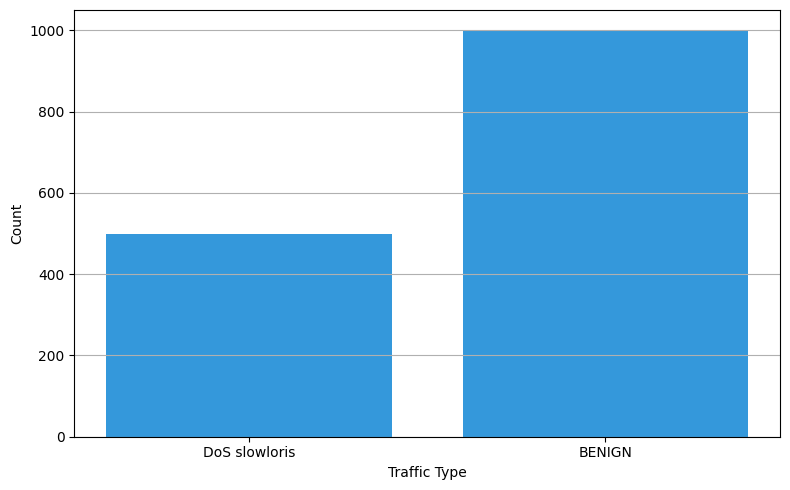

In [9]:
import matplotlib.pyplot as plt
from collections import Counter

label_counts = Counter(decoded_predictions)

# Bar chart
labels = list(label_counts.keys())
counts = list(label_counts.values())

plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color='#3498db')
plt.xlabel('Traffic Type')
plt.ylabel('Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Replace `true_labels` with your actual labels
cm = confusion_matrix(true_labels, decoded_predictions, labels=encoder.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


NameError: name 'true_labels' is not defined

In [ ]:
# Assuming df['Timestamp'] and df['Prediction'] exist
df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # parse timestamps
time_counts = df.groupby([pd.Grouper(key='Timestamp', freq='1min'), 'Prediction']).size().unstack().fillna(0)

time_counts.plot(figsize=(12, 5), title='Traffic Over Time')
plt.xlabel("Time")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()
